In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
data = pd.DataFrame(digits.data)
data['target'] = digits['target']

In [5]:
data.target

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('target', axis = 'columns'), data['target'], test_size = 0.15)

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50)

In [38]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [39]:
model.score(x_test, y_test)


0.9740740740740741

In [10]:
y_predict = model.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[25,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 26,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 22,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  1, 28]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

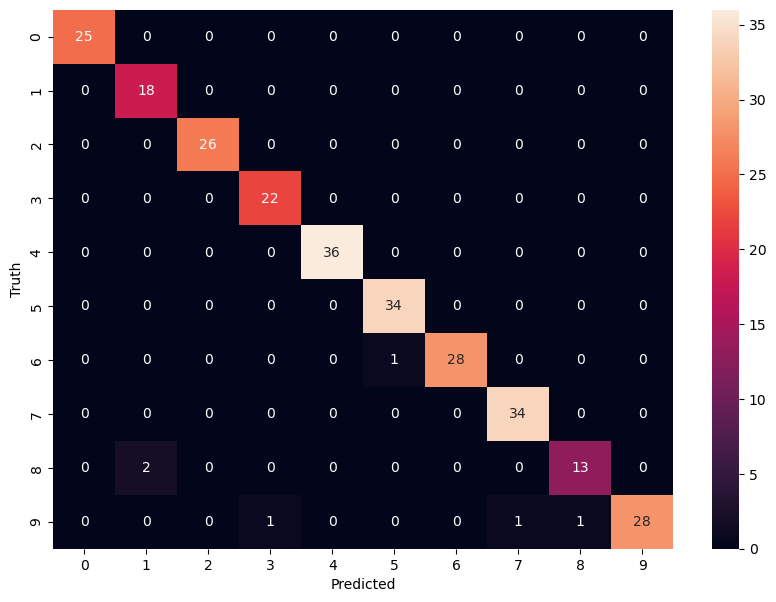

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize = (10, 7))
sb.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")